In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [4]:
# Importing dataset
df = pd.read_csv(r"dataset\tmdb_5000_movies.csv")
print(f" column in dataset ; {df.columns}")
df.head()

 column in dataset ; Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


genres
Drama              2297
Comedy             1722
Thriller           1274
Action             1154
Romance             894
Adventure           790
Crime               696
Science Fiction     535
Horror              519
Family              513
Fantasy             424
Mystery             348
Animation           234
History             197
Music               185
War                 144
Documentary         110
Western              82
Foreign              34
TV Movie              8
Name: count, dtype: int64


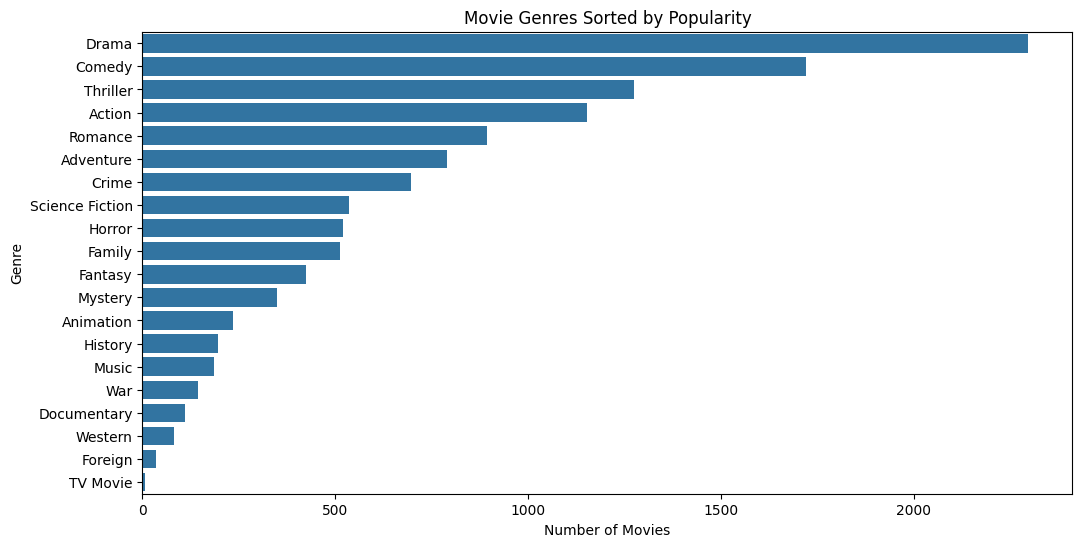

In [5]:
### Most popular Movie Genres
# create (df_copy)
df_copy = df.copy()

# convert json --> list
def convert_genres(genres):
    if isinstance(genres, str):
        return json.loads(genres)
    return genres

# extrac genres
def process_genres(row):
    if isinstance(row, list): 
        genres = [] 
        for genre in row:
            genres.append(genre['name'])
        return genres
    return row 

df_copy['genres'] = df_copy['genres'].apply(convert_genres)
df_copy['genres'] = df_copy['genres'].apply(process_genres)


# .explode() == flatten  (flatten genres columns and counting)
genre_counts = df_copy['genres'].explode().value_counts()
print(genre_counts)

# sort genres by popularity
genre_counts_sorted = genre_counts.sort_values(ascending=False)

# Create a bar chart of movie genres sorted by popularity
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts_sorted.values, y=genre_counts_sorted.index, orient='h')
plt.title('Movie Genres Sorted by Popularity')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

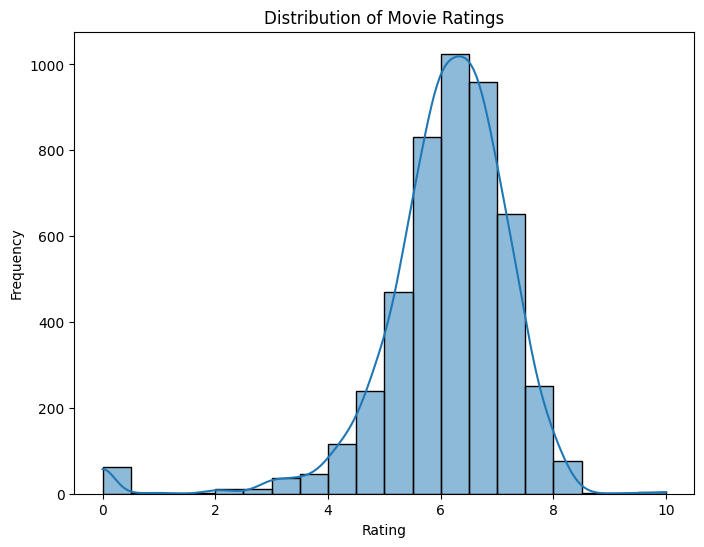

In [6]:
# Movie ratings
plt.figure(figsize=(8, 6))
sns.histplot(df, x='vote_average', bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

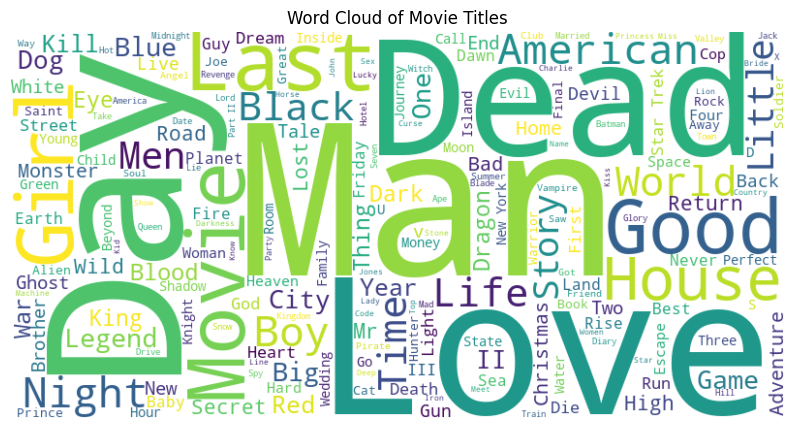

In [7]:
# A word cloud of movie titles
movie_titles = ' '.join(df['title']) # convert series column to string
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(movie_titles)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Movie Titles')
plt.axis('off')
plt.show()

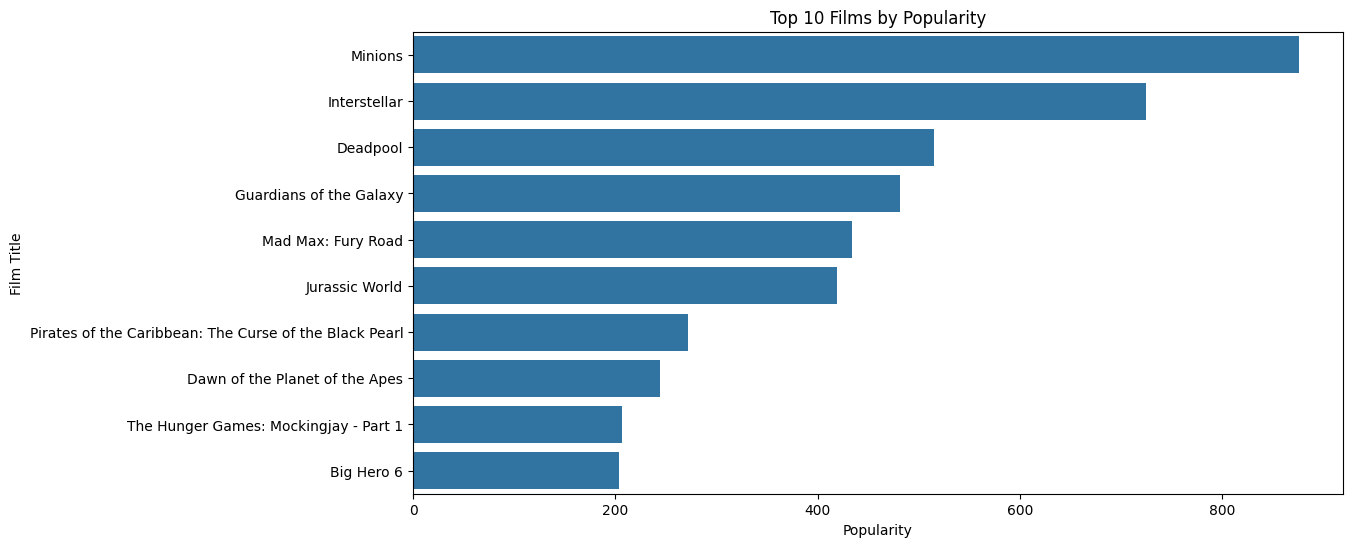

In [8]:
# Sort the DataFrame by popularity (top 10)
highest_popularity = df.sort_values('popularity', ascending=False).head(10)

# Create a bar chart of the top 10 films by popularity
plt.figure(figsize=(12, 6))
sns.barplot(x='popularity', y='title', data=highest_popularity, orient='h')
plt.title('Top 10 Films by Popularity')
plt.xlabel('Popularity')
plt.ylabel('Film Title')
plt.show()

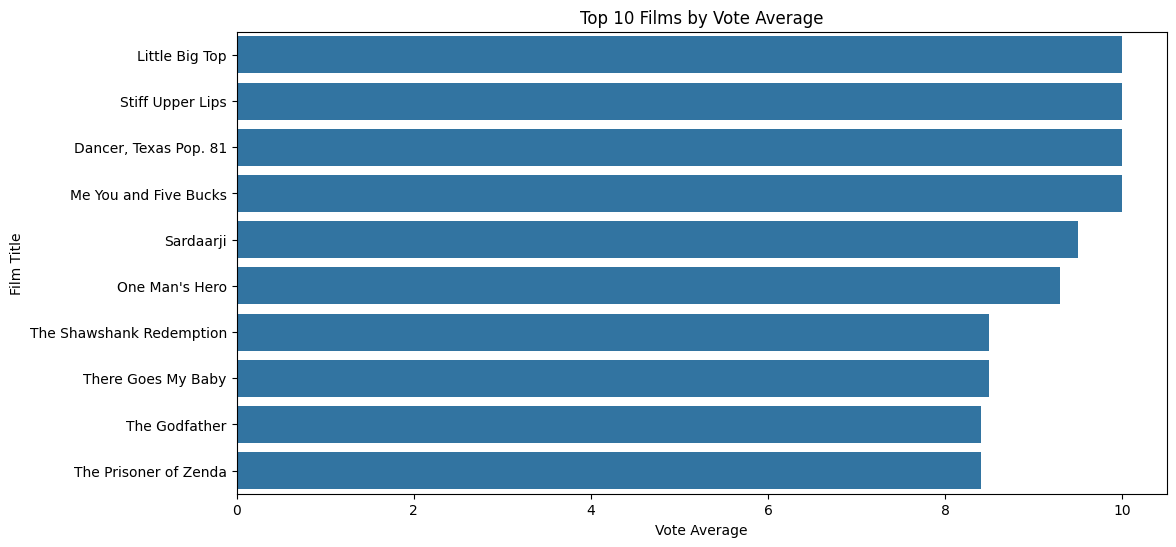

In [9]:
# Sort the DataFrame by vote_average in descending order and select the top 10 rows
highest_vote_average = df.sort_values('vote_average', ascending=False).head(10)

# Create a bar chart of the top 10 films by vote_average
plt.figure(figsize=(12, 6))
sns.barplot(x='vote_average', y='title', data=highest_vote_average, orient='h')
plt.title('Top 10 Films by Vote Average')
plt.xlabel('Vote Average')
plt.ylabel('Film Title')
plt.show()

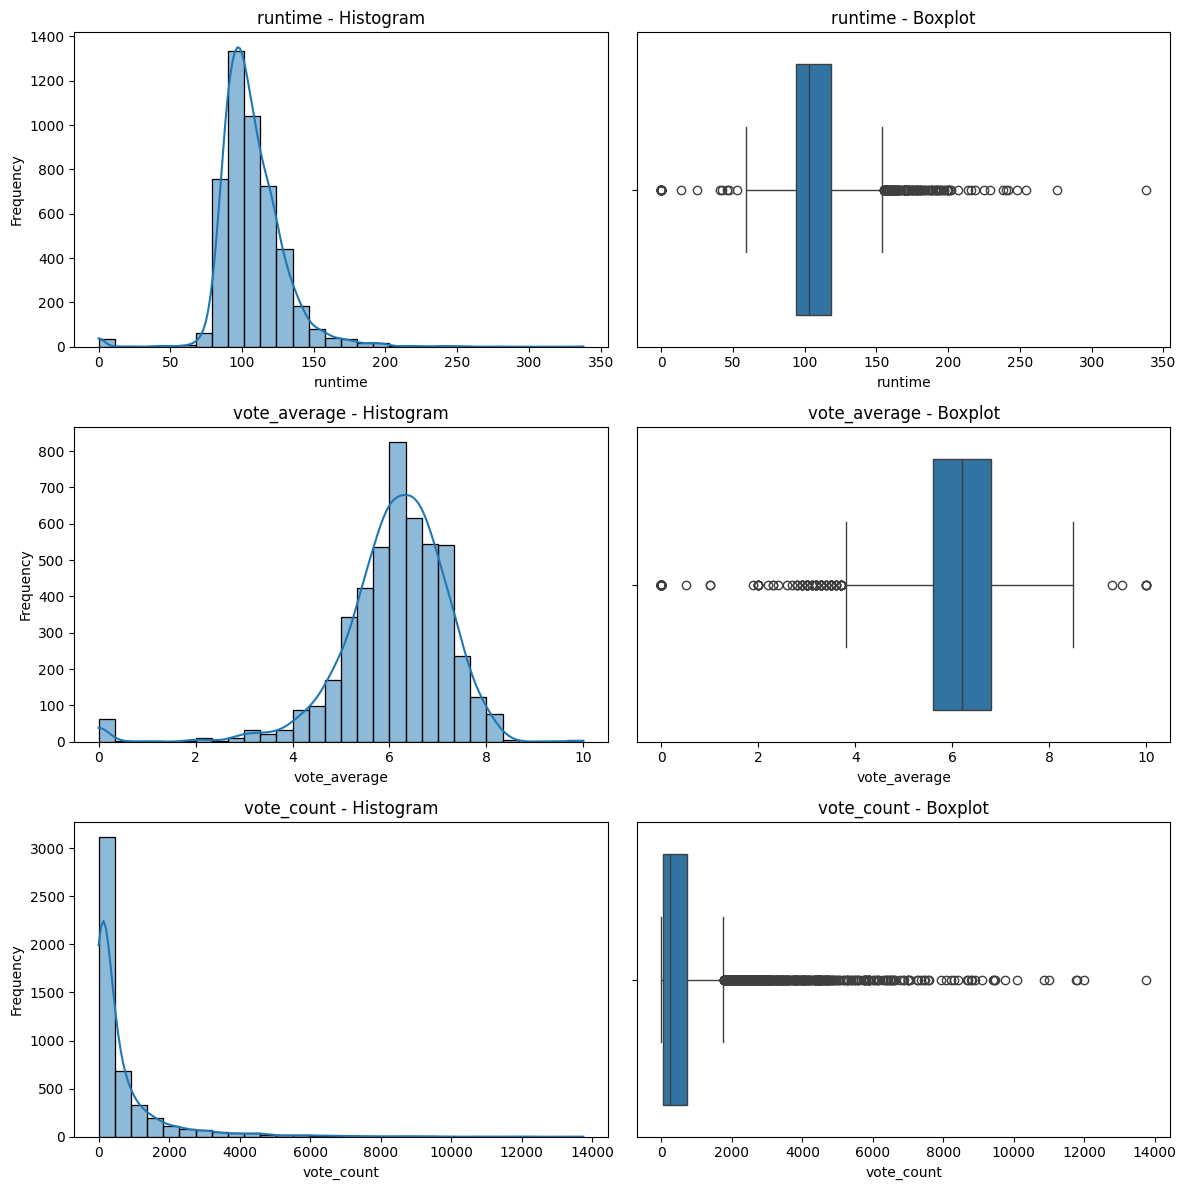

In [10]:
# create subplot (3 row, 2 column)
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
columns = ['runtime', 'vote_average', 'vote_count']

# create histogram and boxplot 
for i, col in enumerate(columns):
    row = i
    col_hist = 0  
    col_box = 1   
    
    # histogram
    sns.histplot(df[col], bins=30, kde=True, ax=axes[row, col_hist])
    axes[row, col_hist].set_title(f'{col} - Histogram')
    axes[row, col_hist].set_xlabel(col)
    axes[row, col_hist].set_ylabel('Frequency')
    
    # boxplot
    sns.boxplot(x=df[col], ax=axes[row, col_box])
    axes[row, col_box].set_title(f'{col} - Boxplot')
    axes[row, col_box].set_xlabel(col)

plt.tight_layout()
plt.show()


In [11]:
print(f"df.shape : {df.shape}")
print(f"runtime <= 30 min : {df[df['runtime']<= 30].shape}")
print(f"vote_avg <= 2 : {df[df['vote_average']<= 2].shape}")
print(f"vote_count <= 150  : {df[df['vote_count']<= 150].shape}")
df = df[(df['runtime']> 30) & (df['vote_average']> 2) & (df['vote_count']> 150)]
df.shape

df.shape : (4803, 20)
runtime <= 30 min : (37, 20)
vote_avg <= 2 : (73, 20)
vote_count <= 150  : (1994, 20)


(2808, 20)

In [12]:
# Define a function to handle parsing JSON or lists
# string to list (json to list)
def parse_json_or_list(value):
    try:
        return json.loads(value)  
    except (TypeError, ValueError):
        return eval(value)


In [13]:
# Apply the function to 'genres' and 'keywords' columns
df['genres'] = df['genres'].apply(parse_json_or_list)  
df['keywords'] = df['keywords'].apply(parse_json_or_list)

In [14]:
df['keywords']

0       [{'id': 1463, 'name': 'culture clash'}, {'id':...
1       [{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...
2       [{'id': 470, 'name': 'spy'}, {'id': 818, 'name...
3       [{'id': 849, 'name': 'dc comics'}, {'id': 853,...
4       [{'id': 818, 'name': 'based on novel'}, {'id':...
                              ...                        
4742    [{'id': 1706, 'name': 'experiment'}, {'id': 37...
4758    [{'id': 2157, 'name': 'hacker'}, {'id': 4769, ...
4773    [{'id': 1361, 'name': 'salesclerk'}, {'id': 30...
4796    [{'id': 1448, 'name': 'distrust'}, {'id': 2101...
4798    [{'id': 5616, 'name': 'united states–mexico ba...
Name: keywords, Length: 2808, dtype: object

In [15]:
# Define a function to create a combined string of genres and keywords
def genres_and_keywords_to_string(row):
    # ตัวแปร genres และ keywords  ถูกเก็บในรูปแบบของ list (1 row / 1 index) 
    # [{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}]
    genres = row['genres']
    keywords = row['keywords']
    # print(genres)
    
    genres_str = ' '.join(''.join(j['name'].split()) for j in genres)
    keywords_str = ' '.join(''.join(j['name'].split()) for j in keywords)

    return f"{genres_str} {keywords_str}"

In [16]:
## axis = 1 ฟังก์ชันจะถูกเรียกใช้กับแต่ละแถว (row) ใน DataFrame 
## ซึ่งเหมาะสมกับการประมวลผลข้อมูลในแถวเดียว
df['string'] = df.apply(genres_and_keywords_to_string, axis=1)

In [17]:
df[['title', 'string']]

,title,string
0,Avatar,Action Adventure Fantasy ScienceFiction cultur...
1,Pirates of the Caribbean: At World's End,Adventure Fantasy Action ocean drugabuse exoti...
2,Spectre,Action Adventure Crime spy basedonnovel secret...
3,The Dark Knight Rises,Action Crime Drama Thriller dccomics crimefigh...
4,John Carter,Action Adventure ScienceFiction basedonnovel m...
...,...,...
4742,Super Size Me,Documentary Comedy Drama experiment health jun...
4758,The Signal,Thriller ScienceFiction hacker supernaturalpow...
4773,Clerks,Comedy salesclerk loser aftercreditsstinger
4796,Primer,ScienceFiction Drama Thriller distrust garage ...


In [18]:
# Initialize the TF-IDF vectorizer with a specified maximum number of features
tfidf = TfidfVectorizer(max_features=2000)
X = tfidf.fit_transform(df['string'])
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 26456 stored elements and shape (2808, 2000)>
  Coords	Values
  (0, 12)	0.08530262130779445
  (0, 23)	0.09568531224920339
  (0, 645)	0.11828035999473506
  (0, 1533)	0.11260105810340144
  (0, 459)	0.24917195657920915
  (0, 740)	0.20097027862956635
  (0, 1656)	0.272256051576965
  (0, 1640)	0.272256051576965
  (0, 1663)	0.22640391344873065
  (0, 741)	0.2568143056535064
  (0, 1475)	0.10584986220493575
  (0, 1654)	0.2210812152417359
  (0, 44)	0.18151597951566475
  (0, 1830)	0.28769779750042357
  (0, 48)	0.2663853722405178
  (0, 310)	0.27919959147739615
  (0, 1070)	0.26129995848609083
  (0, 1643)	0.21358969421185228
  (0, 189)	0.21790570742570323
  (0, 1119)	0.272256051576965
  (0, 10)	0.1695481069187054
  (1, 12)	0.08950513112643718
  (1, 23)	0.10039933460938646
  (1, 645)	0.12410754756071728
  (1, 1243)	0.2547721083385143
  :	:
  (2803, 543)	0.628805626977375
  (2804, 1533)	0.2067785432107655
  (2804, 1790)	0.15103040686880137
 

In [19]:
title_to_index = pd.Series(df.index, index=df['title'].str.lower())
title_to_index.head()

title
avatar                                      0
pirates of the caribbean: at world's end    1
spectre                                     2
the dark knight rises                       3
john carter                                 4
dtype: int64

In [20]:
def recommend(title_data):
    lis = []
    for i in title_data:
        movie_id = title_to_index[i.lower()]
        ## ดึงค่า TF-IDF vector ของภาพยนตร์นั้นจาก matrix X และเก็บไว้ในลิสต์ lis
        lis.append(X[movie_id])

    result = sum(lis)/len(title_data)

    # Calculate cosine similarities between the input movie and all movies
    scores = cosine_similarity(result, X)
    scores = scores.flatten()
    # print(scores)

    # Sort indices by descending similarity scores (excluding the input movie itself)
    # argsort -> return index 
    recommended_movie_id = (-scores).argsort()[len(title_data):10+len(title_data)]
    print(recommended_movie_id)
    # Return the titles of the top 10 recommended movies
    return df['title'].iloc[recommended_movie_id]



In [21]:
recommended_movie_titles = recommend(['avatar'])

# Display the recommendations with popularity and vote average
print(f"\nRecommendations for '{['avatar', 'titanic']}':")
for i, movie_title in enumerate(recommended_movie_titles, start=1):
    # Look up the movie in the original DataFrame
    recommended_movie = df[df['title'] == movie_title].iloc[0]
    popularity = recommended_movie['popularity']
    vote_average = recommended_movie['vote_average']
    print(f"{i}. {movie_title} (Popularity: {popularity:.2f}, Vote Average: {vote_average:.2f})")


[  47 1161   61  258 1932 1107  182 1302 2018  800]

Recommendations for '['avatar', 'titanic']':
1. Star Trek Into Darkness (Popularity: 78.29, Vote Average: 7.40)
2. A Monster in Paris (Popularity: 17.38, Vote Average: 6.50)
3. Jupiter Ascending (Popularity: 85.37, Vote Average: 5.20)
4. Ender's Game (Popularity: 45.95, Vote Average: 6.60)
5. Aliens (Popularity: 67.66, Vote Average: 7.70)
6. Predators (Popularity: 47.65, Vote Average: 6.00)
7. Home (Popularity: 63.47, Vote Average: 6.80)
8. The Astronaut's Wife (Popularity: 20.70, Vote Average: 5.40)
9. End of Watch (Popularity: 49.52, Vote Average: 7.20)
10. Alien³ (Popularity: 45.86, Vote Average: 6.20)


In [22]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# สร้างเวกเตอร์ A และ B
A = np.array([-11111, 2, 3]).reshape(1, -1)
B = np.array([4, -5, 6]).reshape(1, -1)

# คำนวณ cosine similarity
similarity = cosine_similarity(A, B)
print(similarity)


[[-0.45576023]]


In [23]:
df['string'].head()
import joblib
joblib.dump(df, 'df_model.joblib')
joblib.dump(X, 'movie_rec.joblib')

['movie_rec.joblib']

In [29]:
df['title'].values
df.set_index('title')['vote_count'].head()
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,string
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Action Adventure Fantasy ScienceFiction cultur...
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Adventure Fantasy Action ocean drugabuse exoti...
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Action Adventure Crime spy basedonnovel secret...
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Action Crime Drama Thriller dccomics crimefigh...
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,"[{'id': 818, 'name': 'based on novel'}, {'id':...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Action Adventure ScienceFiction basedonnovel m...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4742,65000,"[{'id': 99, 'name': 'Documentary'}, {'id': 35,...",NaN,9372,"[{'id': 1706, 'name': 'experiment'}, {'id': 37...",en,Super Size Me,Morgan Spurlock subjects himself to a diet bas...,10.400603,"[{""name"": ""Kathbur Pictures"", ""id"": 8735}]",...,2004-01-17,28575078,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The first ever reality-based movie ... everyth...,Super Size Me,6.6,506,Documentary Comedy Drama experiment health jun...
4758,4000000,"[{'id': 53, 'name': 'Thriller'}, {'id': 878, '...",https://www.facebook.com/thesignalfilm,242095,"[{'id': 2157, 'name': 'hacker'}, {'id': 4769, ...",en,The Signal,Three college students on a road trip across t...,27.662696,"[{""name"": ""Automatik Entertainment"", ""id"": 281...",...,2014-03-15,600896,95.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,R U Agitated?,The Signal,5.8,631,Thriller ScienceFiction hacker supernaturalpow...
4773,27000,"[{'id': 35, 'name': 'Comedy'}]",http://www.miramax.com/movie/clerks/,2292,"[{'id': 1361, 'name': 'salesclerk'}, {'id': 30...",en,Clerks,Convenience and video store clerks Dante and R...,19.748658,"[{""name"": ""Miramax Films"", ""id"": 14}, {"